In [ ]:
# Mounting gDrive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Opening dataset
import xarray as xr
files = ['/content/drive/My Drive/DS-Solar/DS_G33_Solar.csv']

ds = xr.open_mfdataset('/content/drive/My Drive/DS-Solar/test/*.nc', parallel=True)
# ds = xr.open_mfdataset(files) # testing array input for open_mfdataset.
df = ds.to_dataframe()
df

intTime  intValidTime  \
ens fhour           lat  lon   time                                   
0   0 days 12:00:00 31.0 254.0 2008-01-01  2008010100    2008010112   
                               2008-01-02  2008010200    2008010212   
                               2008-01-03  2008010300    2008010312   
                               2008-01-04  2008010400    2008010412   
                               2008-01-05  2008010500    2008010512   
...                                               ...           ...   
10  1 days 00:00:00 39.0 269.0 2012-11-26  2012112600    2012112700   
                               2012-11-27  2012112700    2012112800   
                               2012-11-28  2012112800    2012112900   
                               2012-11-29  2012112900    2012113000   
                               2012-11-30  2012113000    2012120100   

                                           Downward_Long-Wave_Rad_Flux  \
ens fhour           lat  lon   time                                      
0   0 days 12:00:00 31.0 254.0 2008-01-01                   230.338104   
                               2008-01-02                   237.000000   
                               2008-01-03                   230.171143   
                               2008-01-04                   282.661896   
                               2008-01-05                   265.000000   
...                                                                ...   
10  1 days 00:00:00 39.0 269.0 2012-11-26                   253.000046   
                               2012-11-27                   221.000000   
                               2012-11-28                   247.000000   
                               2012-11-29                   279.934357   
                               2012-11-30                   290.000000   

                                           Downward_Short-Wave_Rad_Flux  \
ens fhour           lat  lon   time                                       
0   0 days 12:00:00 31.0 254.0 2008-01-01                           0.0   
                               2008-01-02                           0.0   
                               2008-01-03                           0.0   
                               2008-01-04                           0.0   
                               2008-01-05                           0.0   
...                                                                 ...   
10  1 days 00:00:00 39.0 269.0 2012-11-26                         238.0   
                               2012-11-27                         260.0   
                               2012-11-28                         250.0   
                               2012-11-29                         240.0   
                               2012-11-30                         240.0   

                                           Maximum_temperature  \
ens fhour           lat  lon   time                              
0   0 days 12:00:00 31.0 254.0 2008-01-01           279.242065   
                               2008-01-02           274.884094   
                               2008-01-03           274.268738   
                               2008-01-04           279.547546   
                               2008-01-05           279.871307   
...                                                        ...   
10  1 days 00:00:00 39.0 269.0 2012-11-26           279.345551   
                               2012-11-27           276.528748   
                               2012-11-28           280.381592   
                               2012-11-29           285.189758   
                               2012-11-30           287.200684   

                                           Minimum_temperature  \
ens fhour           lat  lon   time                              
0   0 days 12:00:00 31.0 254.0 2008-01-01           274.581757   
                               2008-01-02           271.783356   
                               2008-01-03           272.6514

In [ ]:
# Data Stats
print(df.info)
print(df.describe)
print(df.isna().sum())
print(df.mean())
print(df.median())

<bound method DataFrame.info of                                               intTime  intValidTime  \
ens fhour           lat  lon   time                                   
0   0 days 12:00:00 31.0 254.0 2008-01-01  2008010100    2008010112   
                               2008-01-02  2008010200    2008010212   
                               2008-01-03  2008010300    2008010312   
                               2008-01-04  2008010400    2008010412   
                               2008-01-05  2008010500    2008010512   
...                                               ...           ...   
10  1 days 00:00:00 39.0 269.0 2012-11-26  2012112600    2012112700   
                               2012-11-27  2012112700    2012112800   
                               2012-11-28  2012112800    2012112900   
                               2012-11-29  2012112900    2012113000   
                               2012-11-30  2012113000    2012120100   

                                           D

In [ ]:
df['Net_Downward_Rad_Flux'] = np.sum(df[['Downward_Short-Wave_Rad_Flux', 'Downward_Long-Wave_Rad_Flux']], 
                            axis=1) 
                            # - np.sum(d[['Upward_Short_Wave_Rad_Flux', 'Upward_Long_Wave_Rad_Flux']], 
                                            #  axis=1)
# -np.sum is dependent on our definition of the newly added col i.e. here we used Net-Down_Rad

In [ ]:
df.to_csv('DS_G33_Solar.csv')

In [ ]:
display(df)

In [ ]:
# FOR ncdump. Gives metadat info for nc files, here done for upward-long-wave
# !pip install netCDF4
import netCDF4 as nc4
def my_ncdump(file_name):
    with nc4.Dataset(file_name, mode='r') as ncfid:
         for name, var in ncfid.variables.items():
             print("{}:".format(name))
             print("{:>20}: {}".format("Dimension", var.dimensions))
             print("{:>20}: {}".format("Dimension value", var.shape))
             print("{:>20}: {}".format("Type", var.dtype))
             for attr in var.ncattrs():
                 print("{:>20}: {}".format(attr, var.getncattr(attr)))
         print()
         print("Global attributes")
         for attr in ncfid.ncattrs():
             print("{:>20}: {}".format(attr, ncfid.getncattr(attr)))

my_ncdump('/content/drive/My Drive/DS-Solar/test/ulwrf_tatm_latlon_subset_20080101_20121130.nc')

time:
           Dimension: ('time',)
     Dimension value: (1796,)
                Type: float64
           long_name: Time
               units: hours since 1800-01-01 00:00:00
                axis: T
intTime:
           Dimension: ('time',)
     Dimension value: (1796,)
                Type: int32
           long_name: time as an integer (YYYYMMDDHH)
lat:
           Dimension: ('lat',)
     Dimension value: (9,)
                Type: float32
           long_name: Latitude
       standard_name: latitude
               units: degrees_north
        actual_range: [31. 39.]
                axis: Y
lon:
           Dimension: ('lon',)
     Dimension value: (16,)
                Type: float32
           long_name: Longitude
       standard_name: longitude
               units: degrees_east
        actual_range: [254. 269.]
                axis: X
ens:
           Dimension: ('ens',)
     Dimension value: (11,)
                Type: int16
           long_name: ensemble
       standard_name: e

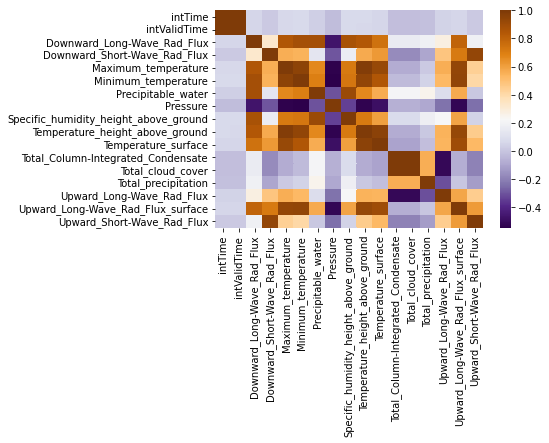

In [ ]:
# Correlation Heatmap (not used)
# (simple code, inferior vis)

# correlation matrix for entire dataset
correlation = df.corr()
# corr heatmat
sb.heatmap(correlation, cmap='PuOr_r')# , vmin = 0.4) #, annot=True) #cmap: The mapping from data values to color space.


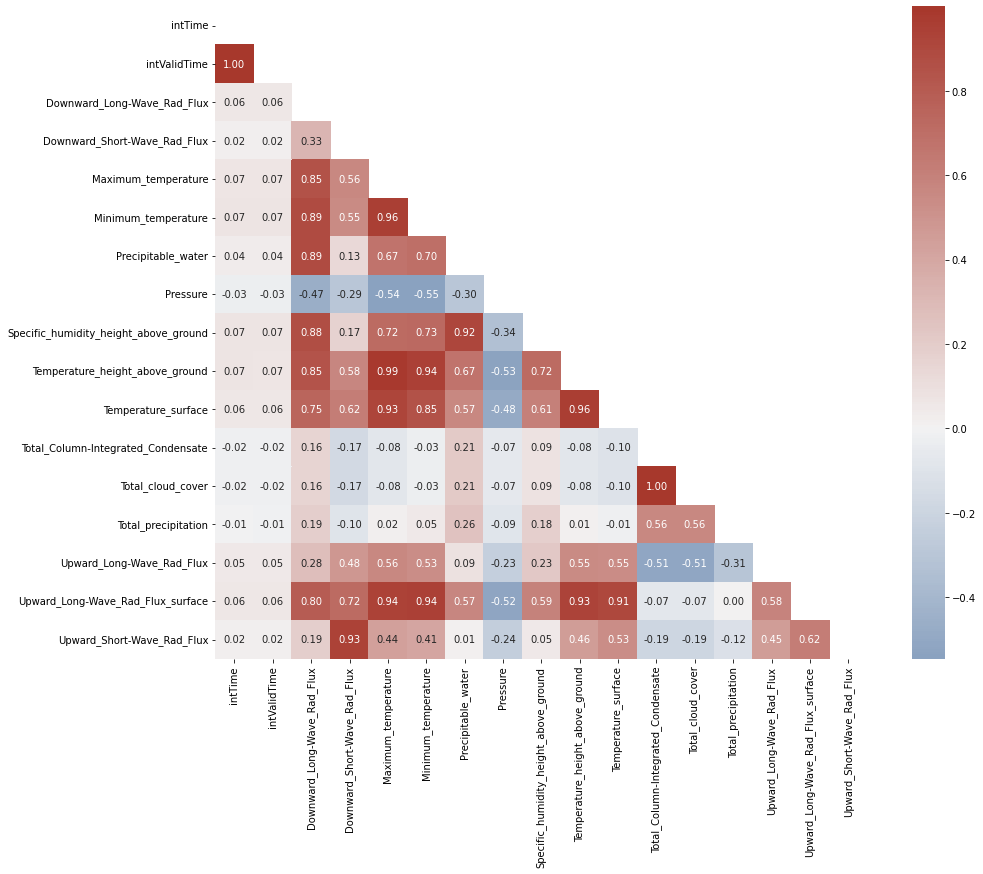

In [ ]:
# Correlation Heatmap 
# (better vis, complex code)


def correlation_matrix(df: pd.DataFrame):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sb.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sb.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)
correlation_matrix(df)

In [ ]:
# Adding new col with formatted Date-Time
# using only ens 0 since this operation takes a lot of time ~ 2m 47s for a single ens 
d = df.loc[[0]]
d['DateTime'] = pd.to_datetime(d['intValidTime'], format='%Y%m%d%H')
d.rename(columns=lambda x: x.replace('-', '_'), inplace=True) 

In [ ]:
# Planned to use for Hypo testing.
# Change in correlation b/w parameters wrt to location(i.e lat,lon)
correlation_matrix(d.iloc[:,:])
correlation_matrix(d.iloc[1125000:1145000,:])

In [ ]:
# NOT USED as plot are either too dense or almost quantised
# plot 1 vs 2. Covnerting to date time format allows better visualization. Used pd.to_dataframe func
 
# Line plots

# slicing df at 1795 selects dates upto 12 PM UTC mark only. Which gives 0 rad_flux for sw 
# Hence use loc to select req lat,lon

# plot 1
d.sort_values('DateTime').iloc[:,:].plot(x='intValidTime', y='Net_Downward_Rad_Flux')
# # df_merged.describe()

# plot 2
d.sort_values('DateTime').iloc[:,:].plot(x='DateTime', y='Downward_Short_Wave_Rad_Flux')
# # df_merged.describe()


# d.loc[[0]].iloc[:1795,:].plot(x='DateTime', y='Net_Rad_Flux')
# d.loc[[0]].sort_values('DateTime').iloc[:1860,:].plot(x='DateTime', y='Net_Rad_Flux')

# d.loc[[0]].sort_values('DateTime').iloc[:155,:].describe()
# display(d.loc[[0]].sort_values('DateTime').iloc[:1825,:])


In [ ]:
# Viewing date for ens 0(since d) lat,lon=(31,254) and for 1 year with 5 entries per day
# is for 1 year since sorted before doing iloc
d.xs((31.0, 254.0), level=['lat','lon']).sort_values('DateTime').iloc[:1795,:]

In [ ]:
# Data vis: Lineplot
# df.xs() gives us a cross section with req indexes and columns
d.xs((31.0, 254.0), level=['lat','lon']).iloc[:1795,:].sort_values('DateTime').plot(x='DateTime', 
                                                                      y=[
                                                                        #  'Downward_Short_Wave_Rad_Flux',
                                                                        #  'Upward_Short_Wave_Rad_Flux',
                                                                         'Net_Downward_Rad_Flux'],
                                                                        title='Weekly Net Downward Flux for (31,254) during 2008-12')
# d.xs((31.0, 254.0), level=['lat','lon']).sort_values('DateTime').plot.area() # trying out Area plot

#Weekly HASNT ACTUALLY BEEN DONE YET. (we've considered only readings corresponding to fhour = 12:00 everyday) 

In [ ]:
# Data vis: Boxplot 
# dff = d.xs((31.0, 254.0), level=['lat','lon']) #.iloc[:1795,:].sort_values('DateTime')
# dff = d.reset_index( level = [2, 3])
ax = d.xs((31.0, 254.0), level=['lat','lon']).boxplot(column=['Downward_Long_Wave_Rad_Flux', 
                                                              'Downward_Short_Wave_Rad_Flux',
                                    'Upward_Short_Wave_Rad_Flux', 'Upward_Long_Wave_Rad_Flux_surface', 
                                    'Net_Downward_Rad_Flux'],
                      # title='Various Rad Fluxes for (31,254)')
                      # by=['lat', 'lon'], 
                      rot=90, fontsize=15)  
# boxplot.title('Various Rad Fluxes for (31,254)')
plt.title('')
ax.set_title('Various Rad Fluxes for (31,254) during 2008-12');
ax = plt.show()
#Hence Box plots for 5 variables are shown. (for location [31,254] during the period 2008-2012) 

In [ ]:
# Two scatter plots shown. They confirm the correlations as shown by the heatmap.
# Observation is Net_down is proportional to Upward_Short as well as Temp_surface
d.xs((31.0, 254.0), level=['lat','lon']).plot.scatter(x = 'Upward_Short_Wave_Rad_Flux', y = 'Net_Downward_Rad_Flux', s = 10).set_title('Various Rad Fluxes for (31,254) during 2008-12')
d.xs((31.0, 254.0), level=['lat','lon']).iloc[:1795,:].sort_values('DateTime').plot.scatter(x = 'Temperature_surface', y = 'Net_Downward_Rad_Flux', s = 10).set_title('Various Rad Fluxes for (31,254) during 2008-12')

In [ ]:
# Hypo testing : z-score
from scipy.stats import zscore
display(df.apply(zscore))
display(df.apply(zscore).describe())


In [ ]:
# Hypo testing : t-test (n < 30)
#
# filter
filter = d[(d.DateTime.dt.year == 2010) & (d.DateTime.dt.month == 3)].iloc[:15,:]
from scipy import stats

t_value,p_value=stats.ttest_ind(filter['Downward_Long_Wave_Rad_Flux'],filter['Downward_Short_Wave_Rad_Flux'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")


Test statistic is 44.961532
p-value for two tailed test is 0.000000
 we are rejecting null hypothesis


In [ ]:
# Hypo testing : z-test (n > 30)

# using iloc for filter since z test doesnt work for very large ranges
filter1 = df.xs((31.0, 259.0), level=['lat','lon']).iloc[:1795,:] 

from statsmodels.stats.weightstats import ztest as ztest

# z_value,p_value=ztest(filter1['Downward_Long-Wave_Rad_Flux'], value=3.167872e+02)
z_value , p_value = ztest(filter1['Downward_Long-Wave_Rad_Flux'], value= df['Downward_Long-Wave_Rad_Flux'].mean())

print('Test statistic is %f'%float("{:.6f}".format(z_value)))

print('p-value for two tailed test is %f'%p_value)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

Test statistic is 1.806974
p-value for two tailed test is 0.070766
we are accepting null hypothesis


In [ ]:
# Analysing/Testing elevation data and POSSIBLE hypo : Var in corr values wrt to ele
ds_ele = xr.open_dataset('/content/drive/My Drive/DS-Solar/gefs_elevations.nc')
df_ele = ds_ele.to_dataframe()
df_ele

In [ ]:
# this shows 5 time steps for each lat,lon,ens 1795 (4 years 11 months) * 5 = 8980
df.groupby(['lat','lon', 'ens']).size().reset_index().rename(columns={0:'count'})


In [ ]:
 Viewing data on 1 Jan 2008 12 UTC
display(df.loc[(df['intValidTime'] == 2008010112)])